In [3]:
import os
import sys
import numpy as np
import xarray as xr
from pandas import Series as pd_Series
import datetime
from dateutil.relativedelta import relativedelta
import warnings
import gc
import dask.array as da
import zarr
from itertools import product
import rioxarray

In [46]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import seaborn as sns
import geopandas as gpd
#import earthpy as et
import xarray as xr
# Spatial subsetting of netcdf files
import regionmask

In [86]:
import netCDF4
from netCDF4 import Dataset

In [8]:
import geopandas as gpd
import regionmask

C:\Users\mugalsamrat.dahal\Anaconda3\envs\geo_env\lib\site-packages\paramiko\transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [1]:
dirname = "F:\\WORK\\GSI_Project\\Soilmoisture\\SMAP-HydroBlocks_postprocessing\\SMAP-HydroBlocks_postprocessing-main\\SMAP-HB_hru_6h"

In [4]:
os.chdir(dirname)

In [11]:
# 1. Define workspace folder
dirs = os.getcwd() # current folder
workspace = '%s\\SMAPHB_sample' % dirs
os.chdir(workspace)

In [12]:
#wsd = gpd.read_file("F:\\WORK\\ERI prop\\prj_py_h12.shp")
wsd = gpd.read_file("F:\\WORK\\GSI_Project\\GIS_work\\Puy_riv_huc12.shp")

In [72]:
s1 = xr.open_dataset("SMAP-HB_surface-soil-moisture_30m_daily_2016-02.nc")

In [73]:
s2=s1.mean(["time"])
s2

<xarray.Dataset>
Dimensions:    (lat: 1080, lon: 1800)
Coordinates:
  * lat        (lat) float64 47.0 47.0 47.0 47.0 47.0 ... 47.3 47.3 47.3 47.3
  * lon        (lon) float64 -122.5 -122.5 -122.5 ... -122.0 -122.0 -122.0
Data variables:
    SMAPHB_SM  (lat, lon) float32 0.2936 0.2936 0.2936 ... 0.2586 0.1339 0.1339

In [74]:
########get area of interest based on the shape file #########

def get_aoi(shp, world=True):
    """Takes a geopandas object and converts it to a lat/ lon
    extent 

    Parameters
    -----------
    shp : GeoPandas GeoDataFrame
        A geodataframe containing the spatial boundary of interest
    world : boolean
        True if you want lat / long to represent sinusoidal (0-360 degrees)

    Returns
    -------
    Dictionary of lat and lon spatial bounds
    """

    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    if world:
        aoi_lon[0] = aoi_lon[0] 
        aoi_lon[1] = aoi_lon[1]
    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

In [75]:
bounds = get_aoi(wsd)

In [76]:
bounds

{'lon': [-122.42297980583209, -122.23962123736669],
 'lat': [47.096946408146096, 47.258844717269824]}

In [77]:
myarr = s2.sel(
#     time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))
myarr

<xarray.Dataset>
Dimensions:    (lat: 583, lon: 661)
Coordinates:
  * lat        (lat) float64 47.1 47.1 47.1 47.1 ... 47.26 47.26 47.26 47.26
  * lon        (lon) float64 -122.4 -122.4 -122.4 ... -122.2 -122.2 -122.2
Data variables:
    SMAPHB_SM  (lat, lon) float32 0.1593 0.1593 0.1654 ... 0.1721 0.1721 0.376

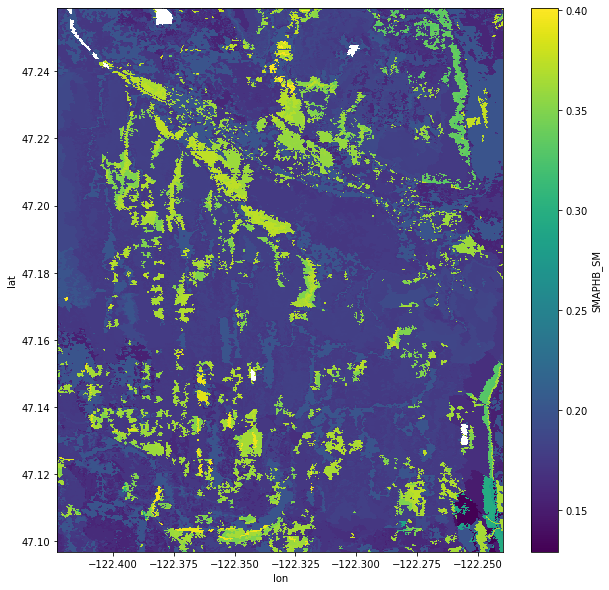

In [78]:
myarr.SMAPHB_SM.plot(figsize = (10, 10))

In [79]:
mynew_mask = regionmask.mask_3D_geopandas(wsd,
                                             myarr.lon,
                                            myarr.lat)

In [80]:
my_fin_arr = myarr.where(mynew_mask)

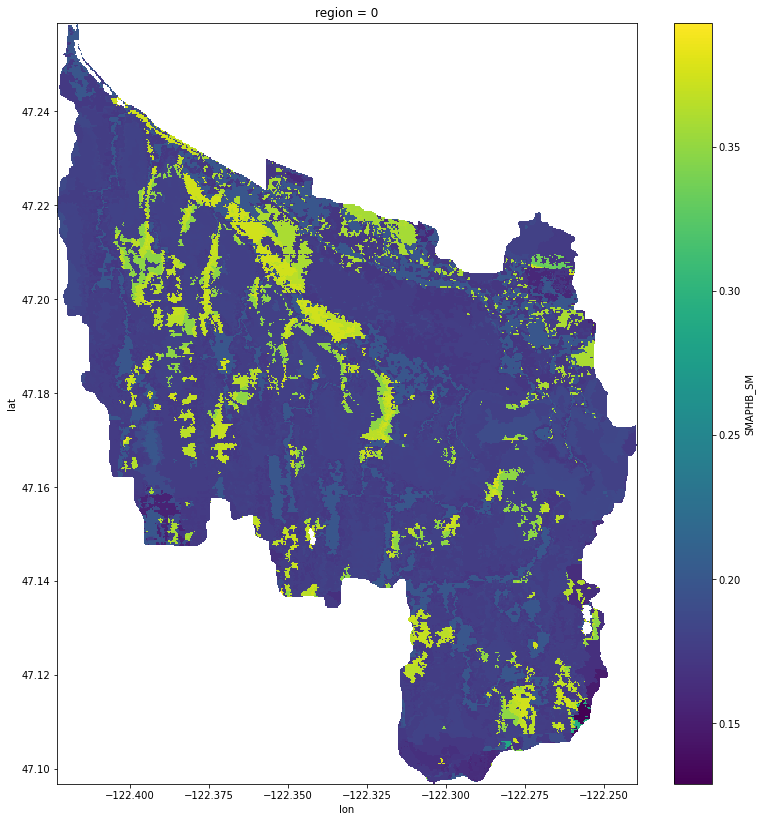

In [81]:
my_fin_arr.SMAPHB_SM.plot(figsize = (13,14))

# 

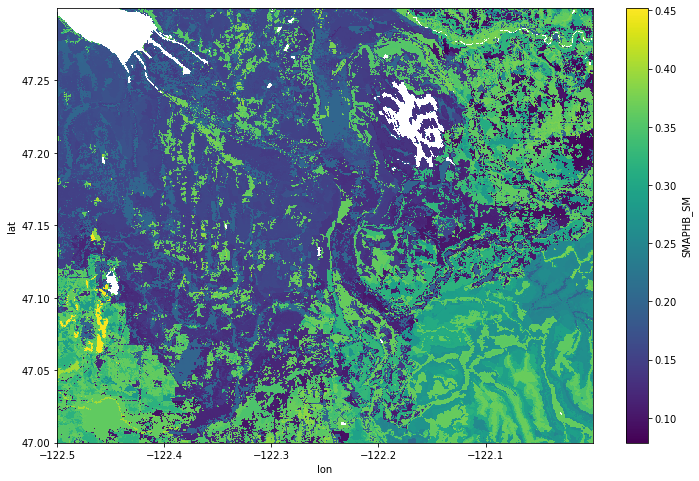

In [50]:
s2.SMAPHB_SM.plot()

In [83]:
s1A = xr.open_dataset("SMAP-HB_surface-soil-moisture_30m_daily_2016-12.nc")
s1B = xr.open_dataset("SMAP-HB_surface-soil-moisture_30m_daily_2017-01.nc")
s1C = xr.open_dataset("SMAP-HB_surface-soil-moisture_30m_daily_2017-02.nc")

In [19]:
ss1 =netCDF4.MFDataset([s1A, s1B, s1C])

In [91]:
DS_all = xr.open_mfdataset(os.path.join(workspace, "*.nc"))

In [92]:
DS_all

<xarray.Dataset>
Dimensions:    (time: 1461, lat: 1080, lon: 1800)
Coordinates:
  * lat        (lat) float64 47.0 47.0 47.0 47.0 47.0 ... 47.3 47.3 47.3 47.3
  * lon        (lon) float64 -122.5 -122.5 -122.5 ... -122.0 -122.0 -122.0
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2019-12-31
Data variables:
    SMAPHB_SM  (time, lat, lon) float32 dask.array<chunksize=(31, 1080, 1800), meta=np.ndarray>
Attributes:
    citation:      Vergopolan et al. (2021). SMAP-HydroBlocks, a 30-m satelli...
    creator_name:  Noemi Vergopolan (noemi@princeton.edu)
    description:   SMAP-HydroBlocks (SMAP-HB) is a 30-m hyper-resolution sate...
    institution:   Princeton University
    title:         SMAP-HydroBlocks Surface Soil Moisture Data (m3/m3)
    unit:          m3/m3

In [105]:
myarr = DS_all.sel(
#     time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))
myarr

<xarray.Dataset>
Dimensions:    (time: 1461, lat: 583, lon: 661)
Coordinates:
  * lat        (lat) float64 47.1 47.1 47.1 47.1 ... 47.26 47.26 47.26 47.26
  * lon        (lon) float64 -122.4 -122.4 -122.4 ... -122.2 -122.2 -122.2
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 ... 2019-12-31
Data variables:
    SMAPHB_SM  (time, lat, lon) float32 dask.array<chunksize=(31, 583, 661), meta=np.ndarray>
Attributes:
    citation:      Vergopolan et al. (2021). SMAP-HydroBlocks, a 30-m satelli...
    creator_name:  Noemi Vergopolan (noemi@princeton.edu)
    description:   SMAP-HydroBlocks (SMAP-HB) is a 30-m hyper-resolution sate...
    institution:   Princeton University
    title:         SMAP-HydroBlocks Surface Soil Moisture Data (m3/m3)
    unit:          m3/m3

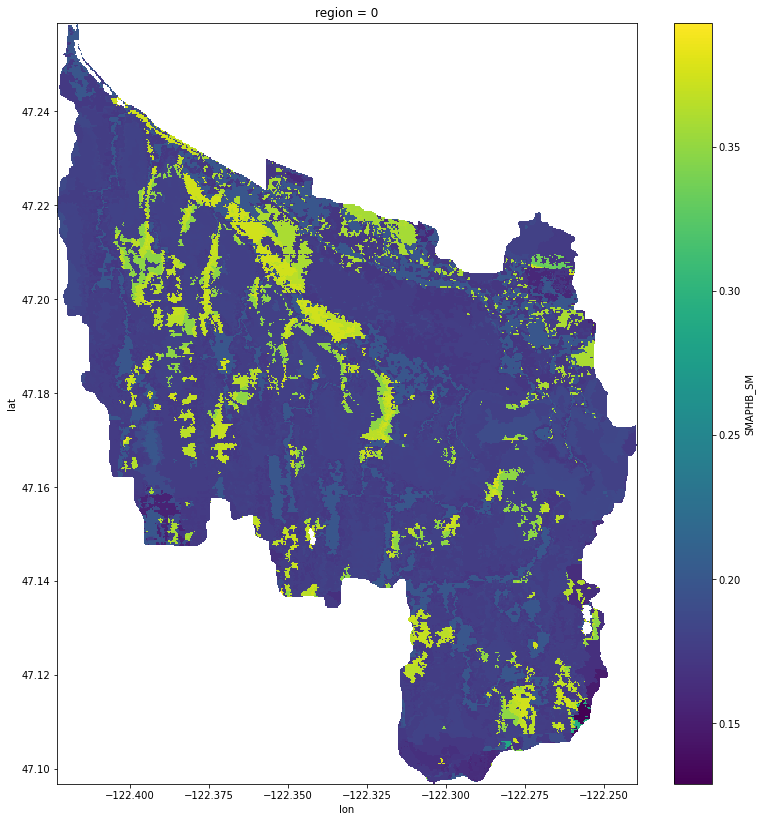

In [108]:
my_arr_summ = myarr.groupby(
    'time.season').mean('time', skipna=True)

In [204]:
my_arr_summ

<xarray.Dataset>
Dimensions:    (season: 4, lat: 583, lon: 661)
Coordinates:
  * lat        (lat) float64 47.1 47.1 47.1 47.1 ... 47.26 47.26 47.26 47.26
  * lon        (lon) float64 -122.4 -122.4 -122.4 ... -122.2 -122.2 -122.2
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    SMAPHB_SM  (season, lat, lon) float32 dask.array<chunksize=(1, 583, 661), meta=np.ndarray>

In [18]:
#my_arr_summ.season.swapdims({'DJF':'A','JJA':'C', 'MAM':'B','SON':'D'})
names = {'DJF':'A','JJA':'C', 'MAM':'B','SON':'D'}
my_arr_summ = my_arr_summ.rename(names, dim = 'season')

In [111]:
my_fin_arr = my_arr_summ.where(mynew_mask)

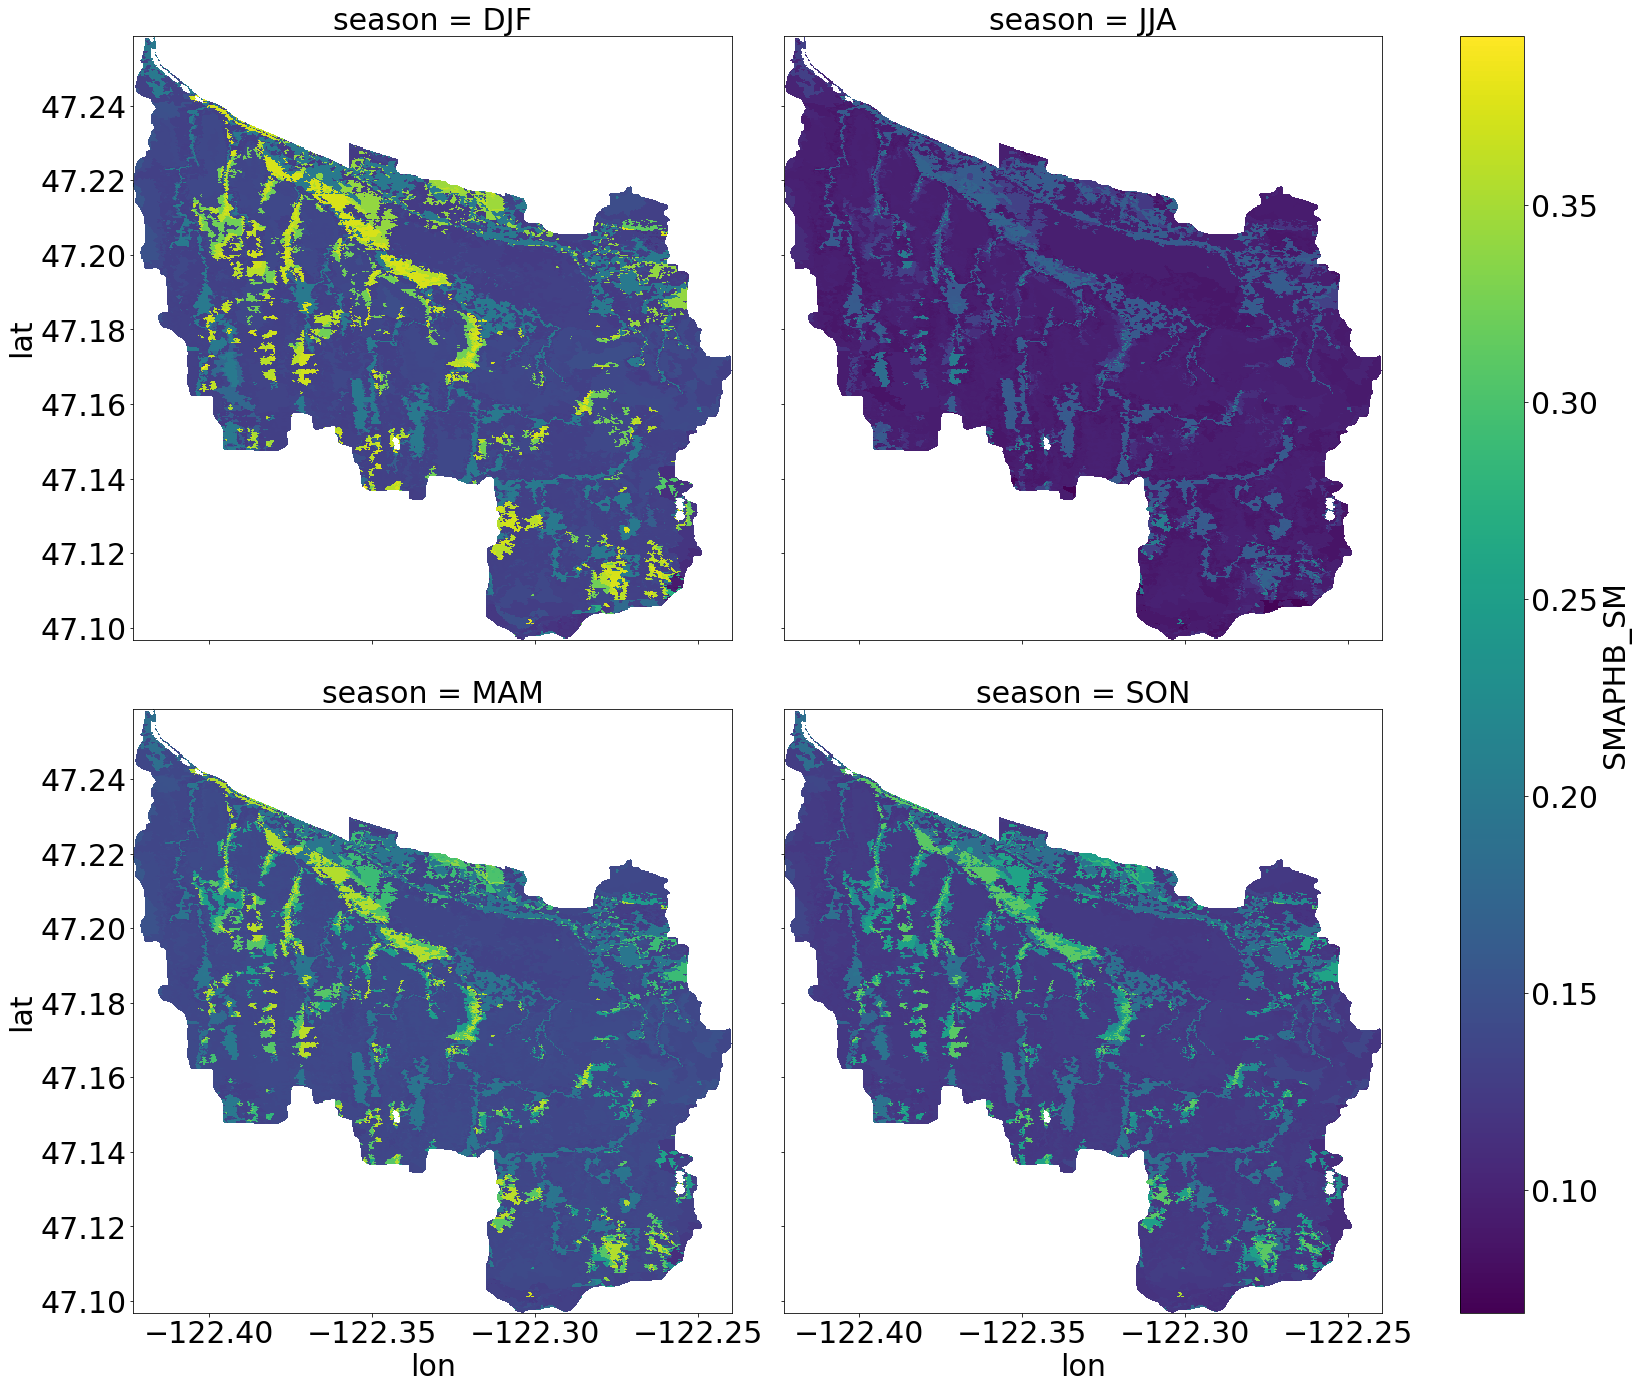

In [212]:
axs = my_fin_arr.SMAPHB_SM.plot(col = 'season', col_wrap=2, figsize = (25,20))

plt.rcParams.update({'font.size' : 30})

plt.savefig('myfourpanels_sm2.eps', format = 'eps')
# plt.xticks(fontsize = 30)
# plt.yticks(fontsize = 30)

In [200]:
# for ax in axs.flat:
#     ax.tick_params(axis='both', labelsize=20)

In [ ]:
# This will create 4 arrays - one for each season showing mean temperature values
#all_season_summary.SMAPHB_SM.plot(col = 'season', col_wrap = 2)

In [17]:
#all_season_summary

In [16]:
#my_fin_arr

In [145]:
a1 = my_fin_arr.sel(season = 'DJF')

In [15]:
#a1

In [147]:
a1.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (lat: 583, lon: 661, region: 1)
Coordinates:
  * lat          (lat) float64 47.1 47.1 47.1 47.1 ... 47.26 47.26 47.26 47.26
  * lon          (lon) float64 -122.4 -122.4 -122.4 ... -122.2 -122.2 -122.2
    season       <U3 'DJF'
  * region       (region) int32 0
    spatial_ref  int32 0
Data variables:
    SMAPHB_SM    (lat, lon, region) float32 dask.array<chunksize=(583, 661, 1), meta=np.ndarray>

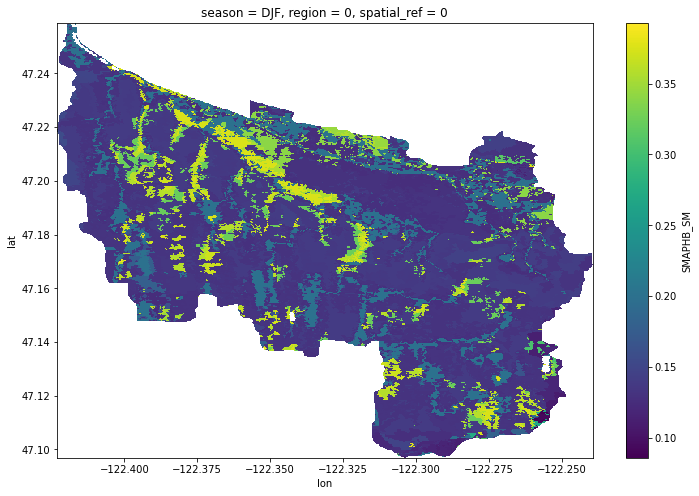

In [132]:
a1.SMAPHB_SM.plot()

In [14]:
#s2.rio.write_crs("epsg:4326", inplace=True)

In [13]:
# da0 = xr.DataArray(
#       data = s2,
#       dims = ["x","y"],
#       coords = dict(
#             x = (["x","y"], lat),
#             y = (["x","y"], lon)
#       )
# )

In [12]:
#s2.rio.set_spatial_dims("lon", "lat", inplace=True)

In [144]:
#s2.rio.to_raster('winter.tif')

In [11]:
#a1.rio.set_spatial_dims("lon", "lat", inplace=True)

In [10]:
#a1['SMAPHB_SM'].rio.to_raster('winter.tif')

In [9]:
#a1

In [1]:
#a2 = a1.drop(['season','region','spatial_ref'])

In [2]:
#a2['SMAPHB_SM'].rio.to_raster('winter.tif')

In [3]:
#a2

In [4]:
#DS_all

In [5]:
#pip install xarray pandas numpy rasterio

In [172]:
#from rasterio.transform import from_origin

In [173]:
# soil_moisture = DS_all['SMAPHB_SM']  # Replace 'soil_moisture' with the actual variable name in your file
# lat = DS_all['lat']
# lon = DS_all['lon']
# time = DS_all['time']

In [177]:
# Extract the month values from the time coordinate
months = pd.DatetimeIndex(time.values).month

# Create a new column in the time coordinate for seasons
seasons = ['DJF', 'MAM', 'JJA', 'SON'] * ((len(time) + 2) // 3)  # Assuming standard Northern Hemisphere seasons
time['season'] = (['time'], seasons[:len(time)])

In [180]:
soil_moisture['season'] = (['time'], seasons[:len(time)])

In [181]:
grouped = soil_moisture.groupby('season')

# Calculate the average value for each season across the time period
average_soil_moisture = grouped.mean(dim='time')

In [8]:
#average_soil_moisture

In [184]:
import rasterio

In [192]:
from rasterio.transform import Affine

In [185]:
# Iterate over each season
for season in average_soil_moisture.season.values:
    # Extract the average soil moisture values for the current season
    season_average = average_soil_moisture.sel(season=season)

    # Create a raster file using rasterio
    # Replace 'output_season.tif' with the desired file name and format
    with rasterio.open('output_{}.tif'.format(season), 'w', driver='GTiff', height=len(lat), width=len(lon),
                       count=1, dtype='float32', crs='EPSG:4326', transform=from_origin(lon[0], lat[-1], lon[1]-lon[0], lat[1]-lat[0])) as dst:
        # Write the average soil moisture values to the raster file
        dst.write(season_average.values, 1)

In [7]:
# # Iterate over each season
# for season in average_soil_moisture.season.values:
#     # Extract the average soil moisture values for the current season
#     season_average = average_soil_moisture.sel(season=season)

#     # Create a raster file using rasterio
#     # Replace 'output_season.tif' with the desired file name and format
#     with rasterio.open('output2_{}.tif'.format(season), 'w', driver='GTiff', height=len(lat), width=len(lon),
#                        count=1, dtype='float32', crs='EPSG:4326') as dst:
#         # Write the average soil moisture values to the raster file
#         dst.write(season_average.values, 1)

In [6]:
#bounds

In [193]:
# for season in average_soil_moisture.season.values:
#     season_average = average_soil_moisture.sel(season=season)

#     # Get the latitude and longitude resolutions
#     lat_resolution = lat[1] - lat[0]
#     lon_resolution = lon[1] - lon[0]

#     # Calculate the transformation matrix
#     transform = Affine(lon_resolution, 0, lon[0], 0, -lat_resolution, lat[-1])

#     # Create a raster file using rasterio
#     with rasterio.open('output3_{}.tif'.format(season), 'w', driver='GTiff', height=len(lat), width=len(lon),
#                        count=1, dtype='float32', crs='EPSG:4326', transform=transform) as dst:
#         # Write the average soil moisture values to the raster file
#         dst.write(season_average.values, 1)